In [1]:
import sys
sys.path.insert(3,"../pre-processing/3D")
sys.path.insert(1,"../numerical_analysis")
sys.path.insert(2,"../analytical")
sys.path.insert(5,"../post-processing")
import numpy as np
from dolfin import *
import matplotlib.pyplot as plt
import scipy.linalg as sc
import epilysis3D_functions as ep3f
import epilysis_3D
import store
import post_3D

In [2]:
#running from the tutorials directory
meshes_location = "../meshes"
paraview_location = "../paraview"
results_location = "../results"

In [3]:
E = np.array([1000.,500.],dtype = np.longlong)
nu = np.array([0.2,0.2],dtype = np.longlong)
Porosity = []
FEM_K = []
FEM_G = []
K_Vo=[]
K_Re=[]
K_M_T=[]
G_Vo=[]
G_Re=[]
G_M_T=[]

In [4]:
for i,name in enumerate(["Spherical_Inclusions_05","Spherical_Inclusions_10","Spherical_Inclusions_12","Spherical_Inclusions_18","Spherical_Inclusions_20","Spherical_Inclusions_30","Spherical_Inclusions_33","Spherical_Inclusions_45","Spherical_Inclusions_47"]):
    store.save_name(name,results_location) #save the name for the post-processing!!!
    #-------------------------------------------------------------------------
    #-------------------------------------------------------------------------
    mesh = Mesh(meshes_location+"/gmsh/" + name + ".xml")
    subdomains = MeshFunction("size_t", mesh, meshes_location+"/gmsh/" + name + "_physical_region.xml")
    a=1
    b=1
    c=1
    vertices = np.array([[0, 0.,0.],#0
                         [a, 0.,0.],#1
                         [a,0.,c],#2
                         [0.,0.,c],#3
                         [0.,b,c],#4
                         [0.,b,0.],#5
                         [a,b,0.],#6
                         [a,b,c]])#7
    vol = a*b*c
    Exx,Eyy,Ezz,Gxy,Gzx,Gyz,nuxy,nuzx,nuyz = ep3f.ortho_from_iso(E,nu)
    store.save_E_nu_iso(name,E,nu,results_location) #save E,nu for the post-processing!!!
    #-------------------------------------------------------------------------
    dx,w,Eps,F,a,L = epilysis_3D.fe_problem(mesh,subdomains,vertices,Exx,Eyy,Ezz,Gxy,Gzx,Gyz,nuxy,nuzx,nuyz)
    C_guess = epilysis_3D.calculate_moduli(name,mesh,vol,dx,w,Eps,F,a,L,Exx,Eyy,Ezz,Gxy,Gzx,Gyz,nuxy,nuzx,nuyz,meshes_location,paraview_location,results_location)
    #-------------------------------------------------------------------------
    K_num = ((C_guess[0,0] + 2 * C_guess[0,1])/3+(C_guess[1,1] + 2 * C_guess[1,2])/3+(C_guess[2,2] + 2 * C_guess[2,1])/3) / 3
    G_num = (C_guess[3,3]+C_guess[4,4]+C_guess[5,5])/3
    v_f = epilysis_3D.calculate_Volume_fraction(mesh,subdomains)
    Porosity.append(v_f)
    FEM_K.append(K_num)
    FEM_G.append(G_num)

Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
Solving linear problem ...
S

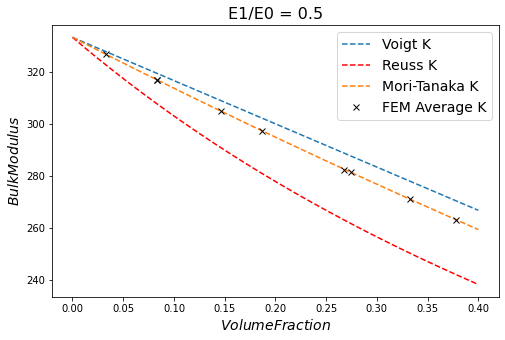

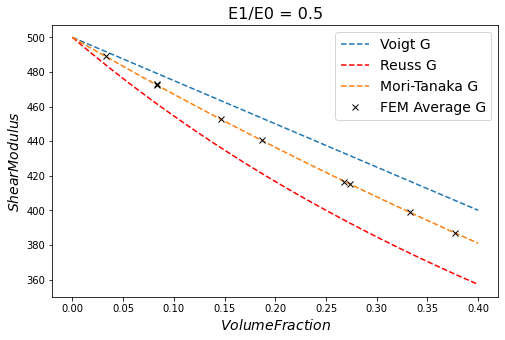

In [5]:
por = np.linspace(0,0.40,1000)
for p in por:
    B_V,B_R,B_MT,G_V,G_R,G_MT = post_3D.b_f(p,E,nu)
    K_Vo.append(B_V)
    K_Re.append(B_R)
    K_M_T.append(B_MT)
    G_Vo.append(G_V)
    G_Re.append(G_R)
    G_M_T.append(G_MT)

fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.plot(por, K_Vo, '--', label='Voigt K')
ax1.plot(por,K_Re,'r--',label='Reuss K')
ax1.plot(por,K_M_T,'--',label='Mori-Tanaka K')
ax1.plot(Porosity,FEM_K,'kx',label='FEM Average K')
ax1.set_xlabel('$Volume Fraction$', fontsize=14)
ax1.set_ylabel('$Bulk Modulus$', fontsize=14)
ax1.set_title('E1/E0 = {}'.format(E[1]/E[0]), fontsize=16)
ax1.legend(loc='best', fontsize=14)

fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.plot(por, G_Vo, '--', label='Voigt G')
ax1.plot(por,G_Re,'r--',label='Reuss G')
ax1.plot(por,G_M_T,'--',label='Mori-Tanaka G')
ax1.plot(Porosity,FEM_G,'kx',label='FEM Average G')
ax1.set_xlabel('$Volume Fraction$', fontsize=14)
ax1.set_ylabel('$Shear Modulus$', fontsize=14)
ax1.set_title('E1/E0 = {}'.format(E[1]/E[0]), fontsize=16)
ax1.legend(loc='best', fontsize=14)